In [1]:
import pandas as pd

df = pd.read_csv('listings.csv')

In [6]:
print(df.head())

      id                                               name  host_id  \
0   2384  Hyde Park - Walk to UChicago, 10 min to McCormick     2613   
1   4505  394 Great Reviews. 127 y/o House. 40 yds to tr...     5775   
2   7126                Tiny Studio Apartment 94 Walk Score    17928   
3   9811                      Barbara's Hideaway - Old Town    33004   
4  10610                   3 Comforts of Cooperative Living     2140   

          host_name  neighbourhood_group   neighbourhood  latitude  longitude  \
0           Rebecca                  NaN       Hyde Park  41.78790  -87.58780   
1  Craig & Kathleen                  NaN  South Lawndale  41.85495  -87.69696   
2             Sarah                  NaN       West Town  41.90289  -87.68182   
3       At Home Inn                  NaN    Lincoln Park  41.91769  -87.63788   
4              Lois                  NaN       Hyde Park  41.79612  -87.59261   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0   

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

In [8]:
print(f"\nThe dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 6397 rows and 16 columns.


EDA DataSet

The dataset contains 6397 rows and 16 variables 
1. The neighbourhood_group column is completely empty (all values are null).
2. The last_review column has some missing values (1,132)
3. The reviews_per_month column also has 1,132 missing values.
4. The other columns seem to be complete, with no missing values.

In [2]:
df_sample = df.sample(n=100, random_state=42)


In [3]:
df_sample.to_csv('live_data.csv', index=False)

In [4]:
df_remaining = df.drop(df_sample.index)

I loaded the dataset into a Pandas DataFrame to facilitate data manipulation and analysis. Next, I randomly selected 100 rows from the DataFrame. These 100 rows will act as our live data for future use. I then saved the selected rows to a new CSV file named `live_data.csv . Finally, I removed the selected rows from the original DataFrame leaving the remaining data ready to be stored in our PostgreSQL database.


In [9]:
df_remaining.to_csv('remaining_data.csv', index=False)

In [10]:
from sqlalchemy import create_engine

In [11]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'7205458456' 
port = r'5432' 

In [16]:
engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [13]:
table_name = 'raw_data'

In [17]:
df_remaining.to_sql(table_name, engine, schema='RawFinalProject', if_exists='replace', index=False)
print("Data successfully uploaded to PostgreSQL.")

Data successfully uploaded to PostgreSQL.


I stored the remainder of your data in your local PostgreSQL database

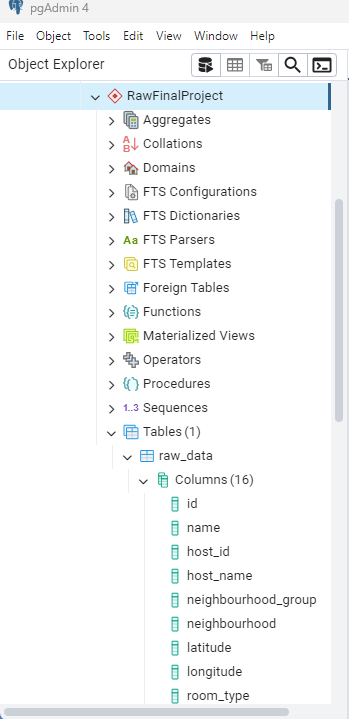

Data Definition:

Field name and description: 

id: Unique identifier for each listing. (Type: Discrete)

name: Name of the listing. (Type: Nominal)

host_id: Unique identifier for each host. (Type: Discrete)

host_name: Name of the host. (Type: Nominal)

neighbourhood_group: General area where the listing is located (not available in this dataset). (Type: Nominal)

neighbourhood: Specific neighborhood where the listing is located. (Type: Nominal)

latitude: Geographic coordinate of the listing. (Type: Continuous)

longitude: Geographic coordinate of the listing. (Type: Continuous)

room_type: Type of room being listed (e.g., entire home/apartment, private room, etc.). (Type: Nominal)

price: Price per night for the listing in dollars. (Type: Continuous)

minimum_nights: Minimum number of nights required to book the listing. (Type: Discrete)

number_of_reviews: Total number of reviews for the listing. (Type: Discrete)

last_review: Date of the most recent review. (Type: Nominal)

reviews_per_month: Average number of reviews per month. (Type: Continuous)

calculated_host_listings_count: Total number of listings managed by the same host. (Type: Discrete)

availability_365: Number of days the listing is available for booking per year. (Type: Discrete)


Analytical Question:
How much should we charge per night based on the property type (room type) and neighborhood to maximize our investment in Chicago?

Target variable: The target variable for this analysis is price, which represents the price per night for a listing.

Features I will remove:

id, host_id, host_name: These do not add value to the pricing analysis.
neighbourhood_group: This column has no useful values ​​(all values ​​are null).
last_review, reviews_per_month: These fields can be removed as they are not as relevant to the current analysis.
calculated_host_listings_count: Although relevant in some contexts, we could do without this variable in this specific analysis.

In [41]:
df_cleaned = df_remaining.drop(columns=['id', 'host_id', 'host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'])

In [42]:
print(df_cleaned.isnull().sum())

name                 0
neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64


In [43]:
df_backup = df_cleaned.copy()

In [44]:
print(df_cleaned['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [45]:
print(df_cleaned['neighbourhood'].unique())

['Hyde Park' 'South Lawndale' 'West Town' 'Lincoln Park' 'Near North Side'
 'Logan Square' 'Uptown' 'North Center' 'Lake View' 'Irving Park'
 'Portage Park' 'Pullman' 'Near South Side' 'West Ridge' 'Near West Side'
 'Edgewater' 'Bridgeport' 'Woodlawn' 'Albany Park' 'Kenwood' 'Avondale'
 'Rogers Park' 'Lincoln Square' 'Grand Boulevard' 'Forest Glen' 'Loop'
 'East Garfield Park' 'North Lawndale' 'Oakland' 'Beverly'
 'Lower West Side' 'Chatham' 'Mckinley Park' 'Norwood Park'
 'Washington Park' 'Morgan Park' 'Dunning' 'West Lawn' 'South Shore'
 'Humboldt Park' 'Armour Square' 'South Deering' 'West Garfield Park'
 'Hermosa' 'Douglas' 'Hegewisch' 'North Park' 'Jefferson Park'
 'West Elsdon' 'Austin' 'Ashburn' 'Belmont Cragin'
 'Greater Grand Crossing' 'Garfield Ridge' 'Brighton Park'
 'Archer Heights' 'Ohare' 'Edison Park' 'Englewood' 'South Chicago'
 'Avalon Park' 'Chicago Lawn' 'Gage Park' 'Montclare' 'Clearing'
 'Roseland' 'Calumet Heights' 'New City' 'Fuller Park' 'Auburn Gresham'
 'West

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
df_backup['room_type'] = le.fit_transform(df_backup['room_type'])
df_backup['neighbourhood'] = le.fit_transform(df_backup['neighbourhood'])

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

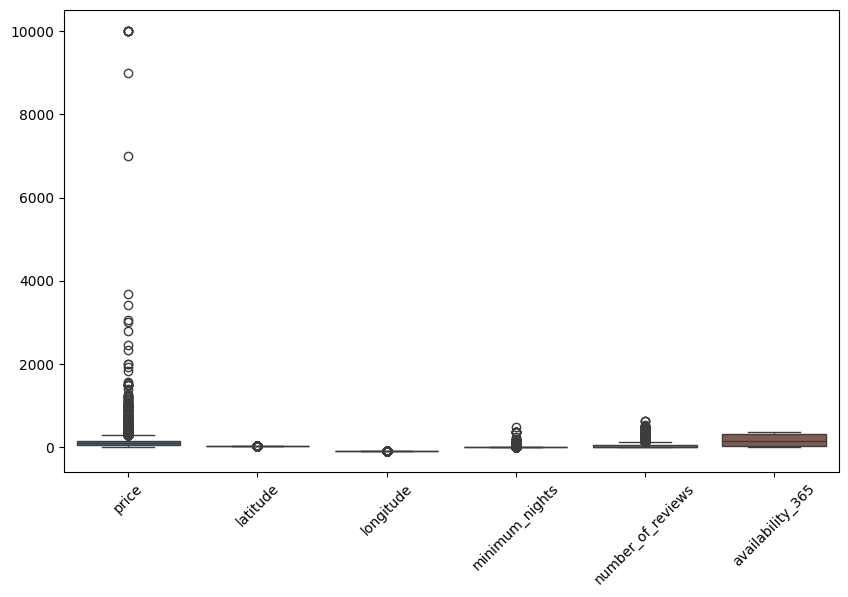

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_backup[numerical_columns])
plt.xticks(rotation=45)
plt.show()

I removed the irrelevant columns from the dataset and converted the categorical variables room_type and neighbourhood into encoded numerical values using LabelEncoder.

Regarding the price variable, I observed that the outliers are mainly upward, indicating some values that are significantly higher than the majority. Given that these outliers are related to prices, after reviewing the highest values, I found them to be plausible and reflective of reality. It is common to encounter outliers in this type of dataset, particularly when dealing with variables like prices and minimum nights.

In [70]:
highest_price = df_backup['price'].max()
lowest_price = df_backup[df_backup['price'] > 0]['price'].min()

print(f"Highest price: {highest_price}")
print(f"Lowest price: {lowest_price}")


Highest price: 10000
Lowest price: 10


In [71]:
df_backup.head()

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,"Hyde Park - Walk to UChicago, 10 min to McCormick",33,41.78790,-87.58780,2,60,2,178,353
1,394 Great Reviews. 127 y/o House. 40 yds to tr...,64,41.85495,-87.69696,0,105,2,395,155
2,Tiny Studio Apartment 94 Walk Score,75,41.90289,-87.68182,0,60,2,384,321
3,Barbara's Hideaway - Old Town,38,41.91769,-87.63788,0,65,4,49,300
4,3 Comforts of Cooperative Living,33,41.79612,-87.59261,2,21,1,44,168


In [72]:
df_backup = df_backup.drop('name', axis=1)

In [73]:
df_backup.to_csv('df_backup_3.csv', index=False)

In [74]:
df_backup.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,33,41.78790,-87.58780,2,60,2,178,353
1,64,41.85495,-87.69696,0,105,2,395,155
2,75,41.90289,-87.68182,0,60,2,384,321
3,38,41.91769,-87.63788,0,65,4,49,300
4,33,41.79612,-87.59261,2,21,1,44,168


In [76]:
df_backup.dtypes

neighbourhood          int32
latitude             float64
longitude            float64
room_type              int32
price                  int64
minimum_nights         int64
number_of_reviews      int64
availability_365       int64
dtype: object

In [78]:
missing_values = df_backup.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [79]:
df_finalcleaned = df_backup

I removed the name column as it does not contribute to the model, and I reviewed the data once more to ensure it is ready

In [80]:
df_finalcleaned[df_finalcleaned['price'] > 3800]

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
648,75,41.90800,-87.67366,2,10000,20,30,358
1245,37,41.95112,-87.67020,0,9999,7,16,80
1707,37,41.93917,-87.64982,2,9999,80,2,363
3938,37,41.95100,-87.65785,0,9000,2,0,365
4144,41,41.88714,-87.62413,1,9999,1,32,168
4145,41,41.88607,-87.62443,1,9999,1,3,173
4146,41,41.88621,-87.62385,1,9999,1,22,173
5558,75,41.91142,-87.67735,2,7000,1,0,365


In [81]:
df_finalcleaned = df_finalcleaned[df_finalcleaned['price'] <= 3800]

In [82]:
df_finalcleaned.info

<bound method DataFrame.info of       neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0                33  41.78790  -87.58780          2     60               2   
1                64  41.85495  -87.69696          0    105               2   
2                75  41.90289  -87.68182          0     60               2   
3                38  41.91769  -87.63788          0     65               4   
4                33  41.79612  -87.59261          2     21               1   
...             ...       ...        ...        ...    ...             ...   
6392             48  41.85574  -87.62507          0    146               2   
6393             48  41.85561  -87.62342          0    195               2   
6394             48  41.85584  -87.62404          0    493               2   
6395             75  41.89005  -87.66668          2     53              32   
6396             17  41.82964  -87.62048          0     61               1   

      number_of_reviews  availa

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

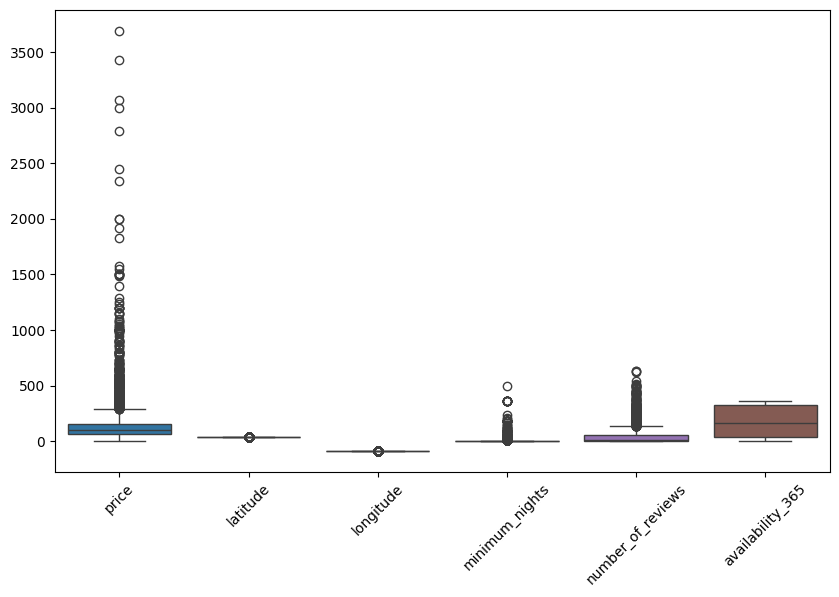

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_finalcleaned[numerical_columns])
plt.xticks(rotation=45)
plt.show()

I decided to remove the records with prices higher than 3800, as they are outliers that could affect our model, and they are not representative since there are only 8 of them.

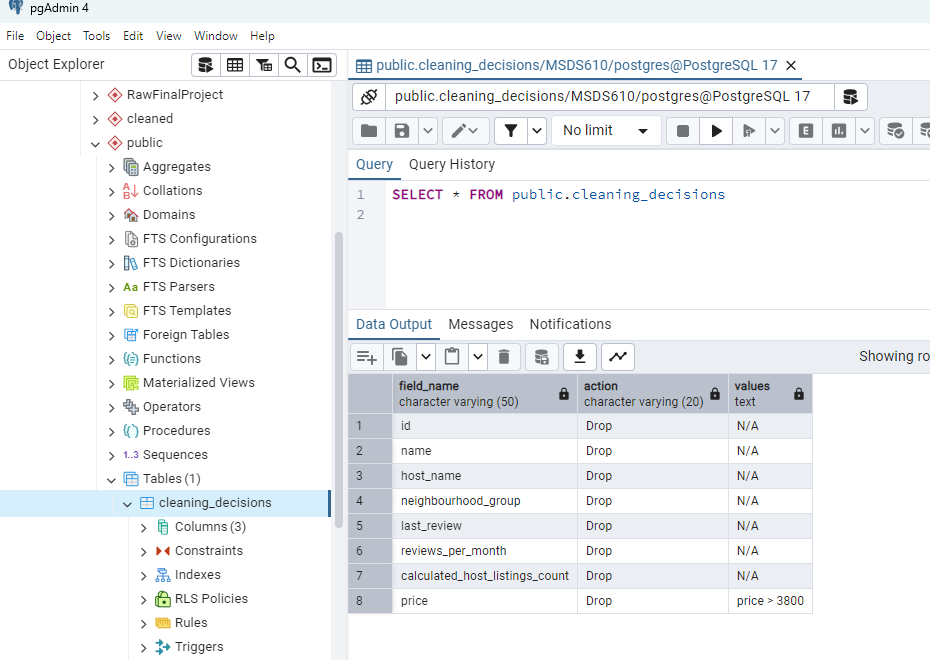

In [87]:
df_finalcleaned['income_potential_per_day'] = df_finalcleaned['price'] * df_finalcleaned['availability_365'] / 365

df_finalcleaned['price_per_room_type_neighbourhood_mean'] = df_finalcleaned.groupby(['room_type', 'neighbourhood'])['price'].transform('mean')

df_finalcleaned.head()

C:\Users\thati\AppData\Local\Temp\ipykernel_2972\3801838932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalcleaned['income_potential_per_day'] = df_finalcleaned['price'] * df_finalcleaned['availability_365'] / 365
C:\Users\thati\AppData\Local\Temp\ipykernel_2972\3801838932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalcleaned['price_per_room_type_neighbourhood_mean'] = df_finalcleaned.groupby(['room_type', 'neighbourhood'])['price'].transform('mean')


,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,income_potential_per_day,price_per_room_type_neighbourhood_mean
0,33,41.78790,-87.58780,2,60,2,178,353,58.027397,85.714286
1,64,41.85495,-87.69696,0,105,2,395,155,44.589041,78.965517
2,75,41.90289,-87.68182,0,60,2,384,321,52.767123,191.133197
3,38,41.91769,-87.63788,0,65,4,49,300,53.424658,199.661479
4,33,41.79612,-87.59261,2,21,1,44,168,9.665753,85.714286


income_potential_per_day: I created this new feature to get an idea of ​​the potential daily income, assuming the property is available on the days listed in availability_365. This will help me understand the value a property can bring based on its availability and price per night.

price_per_room_type_neighbourhood_mean: I calculated the average price of similar properties (by room type and neighbourhood) so I can compare the current price of the property to other similar listings. This is useful for determining if a property is charging more or less than others in the same neighbourhood.

In [88]:
df_finalcleaned_copy = df_finalcleaned.copy()

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

df_finalcleaned[columns_to_normalize] = scaler.fit_transform(df_finalcleaned[columns_to_normalize])

df_finalcleaned.head()


C:\Users\thati\AppData\Local\Temp\ipykernel_2972\427862711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalcleaned[columns_to_normalize] = scaler.fit_transform(df_finalcleaned[columns_to_normalize])


,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,income_potential_per_day,price_per_room_type_neighbourhood_mean
0,33,41.78790,-87.58780,2,0.016260,0.002004,0.281646,0.967123,58.027397,85.714286
1,64,41.85495,-87.69696,0,0.028455,0.002004,0.625000,0.424658,44.589041,78.965517
2,75,41.90289,-87.68182,0,0.016260,0.002004,0.607595,0.879452,52.767123,191.133197
3,38,41.91769,-87.63788,0,0.017615,0.006012,0.077532,0.821918,53.424658,199.661479
4,33,41.79612,-87.59261,2,0.005691,0.000000,0.069620,0.460274,9.665753,85.714286


### Data Normalization

I performed normalization as an important step to handle the varying magnitudes of the numerical data. By normalizing, I ensure that all features are on the same scale before training the model. This is crucial because large differences in scale between variables could cause certain features to dominate over others, which could negatively impact the model's performance.

I used the Min-Max Scaling technique to scale the values between 0 and 1, preserving the relationships between the original data while eliminating the effect of differing scales.

The columns I normalized include:
- price: The price per night of the property.
- minimum_nights: The minimum number of nights the property can be rented.
- number_of_reviews: The total number of reviews the property has received.
- availability_365: The availability of the property throughout the year, in days.

Normalizing these features ensures that no single feature disproportionately influences the model, allowing for more balanced predictions.

In [90]:
df_finalcleaned.to_sql('cleaned_data1', engine, if_exists='replace', index=False)

289

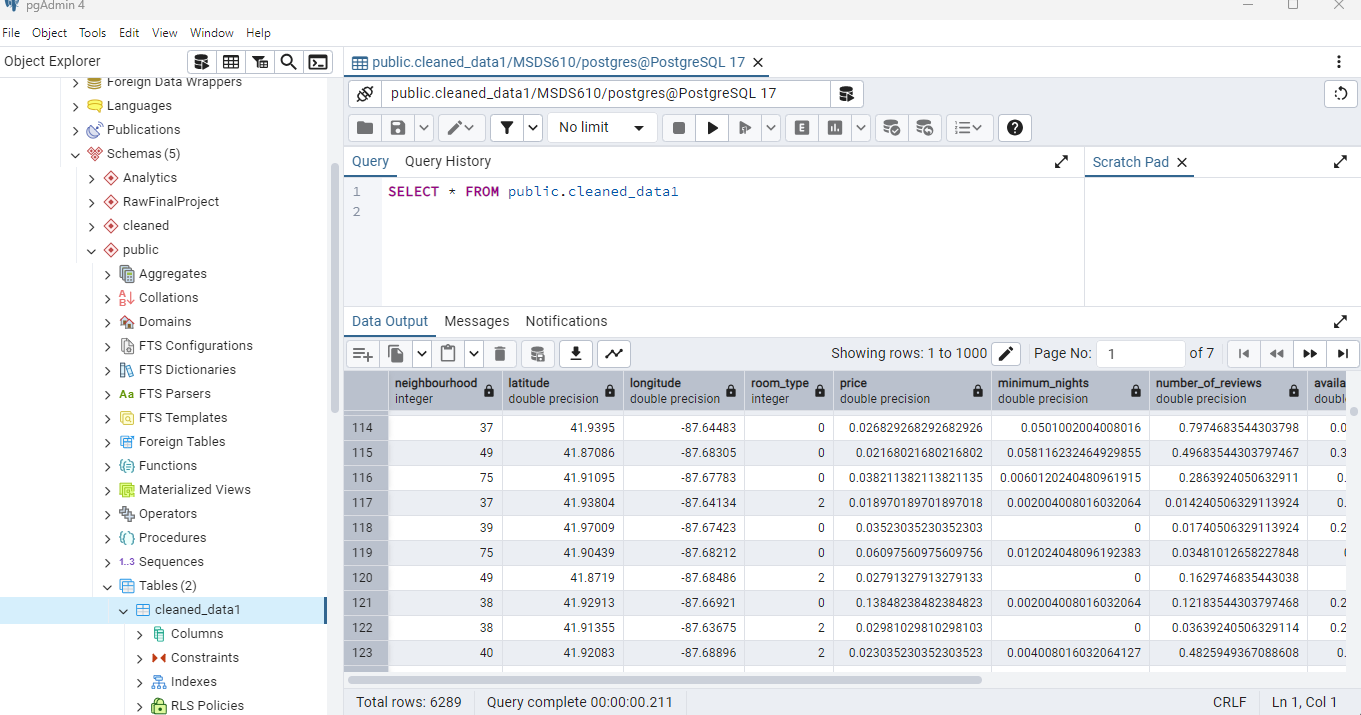

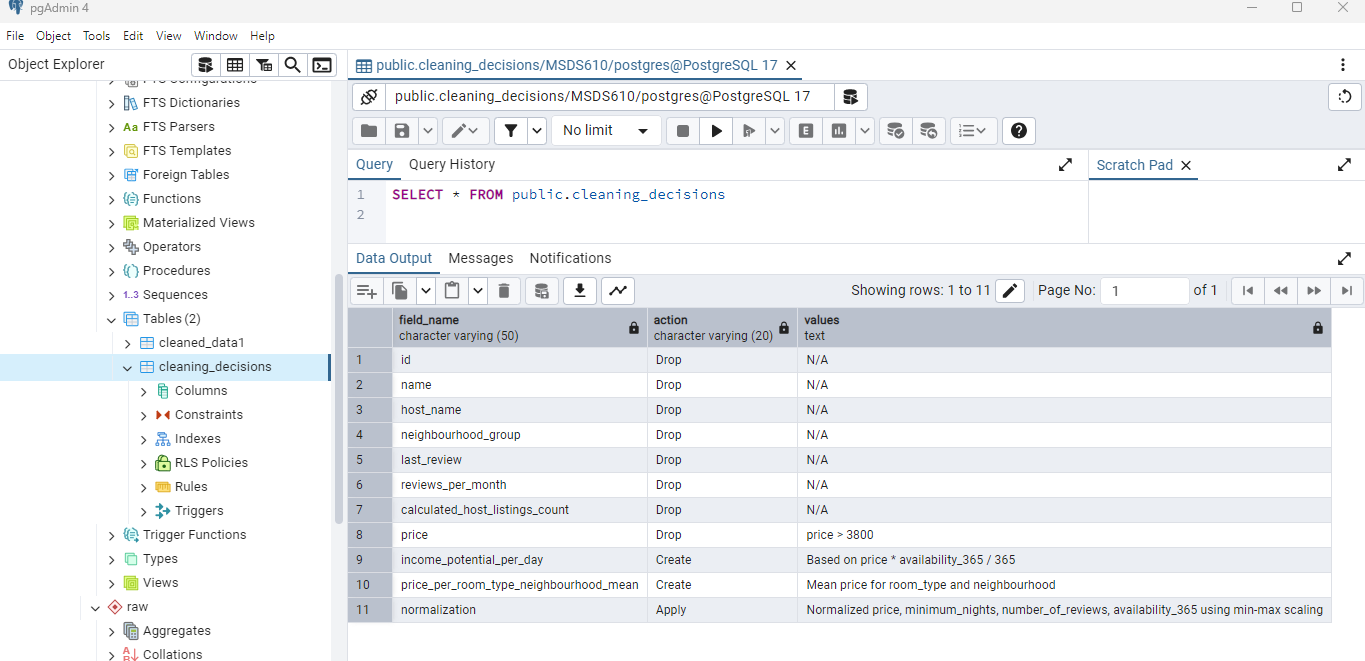

New Features:

income_potential_per_day: This feature calculates the potential daily income from each property. It is based on the formula: price * availability_365 / 365. This will help me assess the potential revenue a property can generate on a daily basis.
price_per_room_type_neighbourhood_mean: This feature represents the average price of similar properties in the same room type and neighborhood. It allows me to compare each property's price with others in the same area and room type, giving insight into whether a property is priced higher or lower than the local average.
Normalization: I applied min-max scaling to the following columns to ensure they are on the same scale and ready for modeling:

price
minimum_nights
number_of_reviews
availability_365
This normalization process scales the values between 0 and 1, which is essential for algorithms sensitive to the range of data, such as distance-based models.

Database Updates:

I created a new table, cleaned_data, to store the processed dataset, including the newly created features and the normalized data.
Additionally, I updated the cleaning_decisions table to log these cleaning and feature creation steps. This serves as a record of the decisions made during the data preparation phase, ensuring transparency and traceability.

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
X = df_finalcleaned.drop('price', axis=1)
y = df_finalcleaned['price']

In [96]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f'Random Forest MSE: {mse_rf}')


Random Forest MSE: 0.0002451958483229376


In [104]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9782530696586896
0.8330270105905483


In [100]:
import xgboost as xgb

In [101]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


y_val_pred_xgb = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')


XGBoost MSE: 0.0003795442623220109


In [107]:
print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))

0.9939863391806203
0.6996163324064062


Random Forest appears to have a better balance between the fit to the training and test data, making it a better choice in terms of generalization.
XGBoost, while having a better fit on the training set, has a poorer performance on the test set, suggesting that it might be overfitting the training data.

For this project, I chose to focus on both Random Forest and XGBoost as potential models because of their ability to handle complex datasets with a variety of feature types. Random Forest is an ensemble learning method known for its robustness and capacity to avoid overfitting by averaging multiple decision trees. This model often performs well when there are many features and interactions, making it a strong candidate for this kind of real estate price prediction task.

On the other hand, XGBoost is a gradient boosting technique that can efficiently handle large datasets with high predictive power, thanks to its optimization algorithms. Although in this particular case, Random Forest yielded better results in terms of accuracy and Mean Squared Error (MSE), I opted to test both models to ensure that I explored different methods and selected the most reliable one based on performance metrics.

The Random Forest model performed better in both R² and MSE on the test set, which solidified my decision to use it as the final algorithm. This selection was based on its ability to balance model complexity and performance, yielding the most reliable predictions for our goal of determining nightly property rates in Chicago.

In [108]:
import joblib

In [109]:
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [119]:
df_finalcleaned_copy = df_finalcleaned.copy()


In [110]:
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)


In [111]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']